# imports:

In [1]:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist
from GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

done1
stop
stop
done1
stop
done


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate

'22032018'

# plan

1. copy relevant functions and change what's needed to generate r for all possible pairs

# modified functions:

pearson_TCRseq_mbSpecies_forHeatMap(speciesList, sequenceList, species_sequences_df, resultFolder, outlierSTD):
was copied to TCR_microbiome_interactions_functions.py

find_associations_TCR_RA_MBspecies_RA_forHeatMap(MbDF, MbDFName,TCRdf_RA, TCRdfName,topNseqs, topNspecies, outlierSTD):
doesn't exist anymore, use find_associations_TCR_RA_MBspecies_RA(MbDF_RA, MbDFName,TCRdf_RA, TCRdfName, NsharedSamplesForSpecies,NsharedSamplesForSeqs,
                                          topNspecies, topNseqs,outlierSTD,resultFolder,completePearson,pearsonForHeatMap)
with pearsonForHeatMap=True




# prepare files:

### Mb file

In [ ]:
# Mb filtered file:
f2='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/MicrobiomeDataTables/FilteredAndMergedOnBD/MPA_s_Metabolon2_PNP434_filGenotek_fil9000000reads_meannSTD(3,)nMinSamples3_filterOutlierSampleFalse_filterSamePersonTrue'

Mb_PNP434_onlySwabs_only9Mreads=pd.read_pickle(f2)
Mb_PNP434_onlySwabs_only9Mreads=Mb_PNP434_onlySwabs_only9Mreads.set_index('BD') #### very important!!

In [ ]:
Mb_PNP434_onlySwabs_only9Mreads.head()

In [ ]:
#### remove all columns that belong to BD_FD file:

In [ ]:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/updatedBDandFDlists/final_BD_FD_converter_mergedOnYear_RCfolderMetabolon2_18032018'
BD_FD=pd.read_pickle(f1)

In [ ]:
#remove from filtered file:
for column in BD_FD.columns.values:
    if column in Mb_PNP434_onlySwabs_only9Mreads.columns.values:
        print 'dropping %s column' %column
        Mb_PNP434_onlySwabs_only9Mreads=Mb_PNP434_onlySwabs_only9Mreads.drop(column,axis=1)

### load and edit TCR file:

In [ ]:
# #load binary file::
file1 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PublicSeqAnalysis/sharingMatrix_moreThan50_434Samples'
sharingMatrix_moreThan50_434Samples = pd.read_pickle(file1)

In [ ]:
#load RA file:
file1 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PublicSeqAnalysis/sharingMatrix_moreThan50_434Samples_RA'
sharingMatrix_moreThan50_434Samples_RA = pd.read_pickle(file1)

# run old modified functions:



the code in the following cell was employed to run the old version of the function

In [ ]:
#with top100 species and sequences

MbDF=Mb_PNP434_onlySwabs_only9Mreads
MbDFName='Mb_PNP434_metabolon2_onlySwabs_only9Mreads'
TCRdf_RA=sharingMatrix_moreThan50_434Samples_RA
TCRdfName='TCRdf_pnp434_more50_RA'



find_associations_TCR_RA_MBspecies_RA_forHeatMap(MbDF, MbDFName,TCRdf_RA, TCRdfName,topNseqs=100, topNspecies=100, outlierSTD=3)

# generate heatmap

## def function

In [ ]:
the function gen_heatmap_and_clustermap was copied to TCR_microbiome_interactions_functions.py

## run modified function 
from TCR_microbiome_interactions_functions.py

In [3]:
figFolder='%s/TCR_real_data/PhenotypicData/Microbiome-TCR interactions/\
CorrelResults_MbPNP434notFiltered_TCRdfPNP434more50_NsharedSpecies200_Nsharedseqs200_topSpeciesNone_topSeqsNone_outlierSTDNone' %MyPath
file1='%s/PearsonResultsHeatmap_MbPNP434notFiltered_TCRdfPNP434more50_NsharedSpecies200_Nsharedseqs200_topSpeciesNone_topSeqsNone_outlierSTDNone.xlsx' %figFolder
Rtable=pd.read_excel(file1)
RtableName='PNP434_NsharedSpecies200_Nsharedseqs200_outlierSTDNone'
figsizeX=5
figsizeY=16
fontsizeX=11
fontsizeY=11
fontSizeLabel=20
sortMethod='max'

heatMapFig,cg=gen_heatmap_and_clustermap(Rtable,RtableName,figFolder,figsizeX,figsizeY,fontsizeX,fontsizeY,fontSizeLabel,sortMethod)

Rtable shape is 450_3
number of unique species=75
number of unique sequences=6
(75, 6)


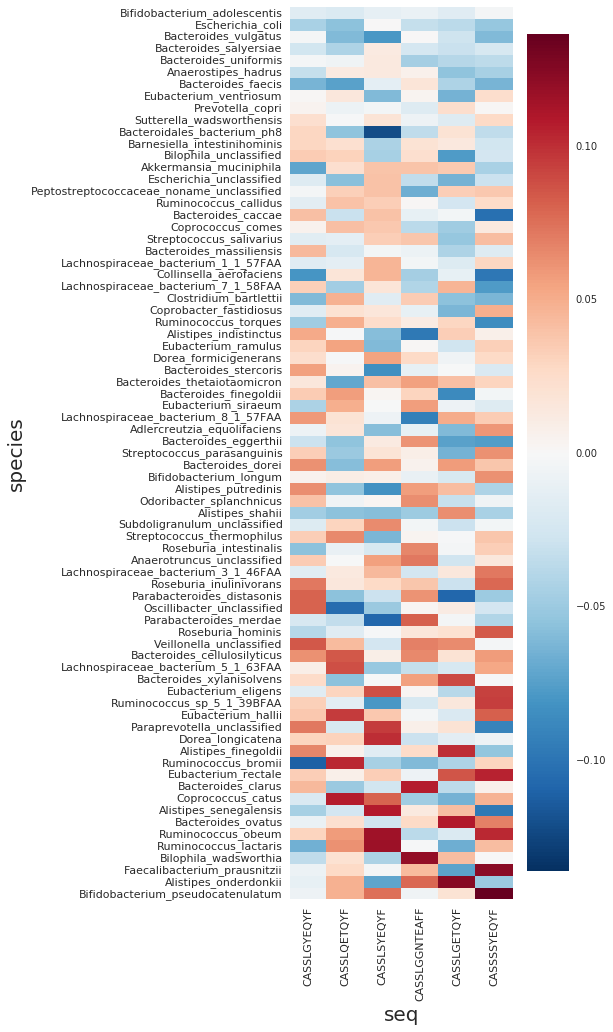

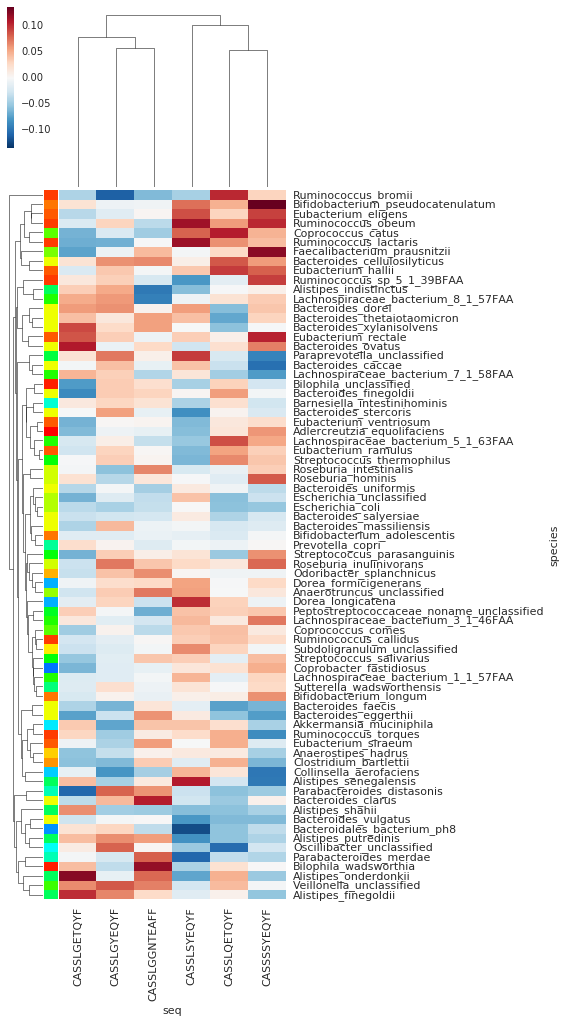

In [4]:
plt.show()